Estudio

INFORME SOBRE EL MERCADO DE ACCIONES

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
%matplotlib inline

# Otras importaciones
# ==============================================================================
import seaborn as sns
from scipy import stats

In [2]:
# Tratamiento y obtención de los Datos
# ==============================================================================
url='https://raw.githubusercontent.com/NestorDiazDataSC/Analisis_de_Datos/main/Analisis_Acciones/Datasetfinanciero.csv'

df= pd.read_csv(url)
df

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813863e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,XYL,Xylem Inc.,Industrials,70.24,30.94,1.170079,1.83,76.81,46.860,1.291502e+10,7.220000e+08,2.726209,5.31,http://www.sec.gov/cgi-bin/browse-edgar?action...
501,YUM,Yum! Brands Inc,Consumer Discretionary,76.30,27.25,1.797080,4.07,86.93,62.850,2.700330e+10,2.289000e+09,6.313636,212.08,http://www.sec.gov/cgi-bin/browse-edgar?action...
502,ZBH,Zimmer Biomet Holdings,Health Care,115.53,14.32,0.794834,9.01,133.49,108.170,2.445470e+10,2.007400e+09,3.164895,2.39,http://www.sec.gov/cgi-bin/browse-edgar?action...
503,ZION,Zions Bancorp,Financials,50.71,17.73,1.480933,2.60,55.61,38.430,1.067068e+10,0.000000e+00,3.794579,1.42,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [3]:
headers = ["Ticker", "Empresa", "Sector" , "Precio", "Margen", "Rendimiento de dividendos", "Beneficio/Acciones", "Bajo Semanal" , "Alto Semanal" , "Capitalización", "EBITDA", "Precio/Vtas", "Precio/Libro", "Web"]
df.columns = headers
# Traducir los titulos para un mejor entendimiento

In [4]:
df.head (4)

,Ticker,Empresa,Sector,Precio,Margen,Rendimiento de dividendos,Beneficio/Acciones,Bajo Semanal,Alto Semanal,Capitalización,EBITDA,Precio/Vtas,Precio/Libro,Web
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813863e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [5]:
df.dtypes # Analizando la base de datos y su composición.

Ticker                        object
Empresa                       object
Sector                        object
Precio                       float64
Margen                       float64
Rendimiento de dividendos    float64
Beneficio/Acciones           float64
Bajo Semanal                 float64
Alto Semanal                 float64
Capitalización               float64
EBITDA                       float64
Precio/Vtas                  float64
Precio/Libro                 float64
Web                           object
dtype: object

In [6]:
df.describe (include = "all") # Para ver estadisticas basicas de la base de datos.

,Ticker,Empresa,Sector,Precio,Margen,Rendimiento de dividendos,Beneficio/Acciones,Bajo Semanal,Alto Semanal,Capitalización,EBITDA,Precio/Vtas,Precio/Libro,Web
count,505,505,505,505.000000,503.000000,505.000000,505.000000,505.000000,505.000000,5.050000e+02,5.050000e+02,505.000000,497.000000,505
unique,505,505,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,505
top,MMM,3M Company,Consumer Discretionary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.sec.gov/cgi-bin/browse-edgar?action...
freq,1,1,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
mean,NaN,NaN,NaN,103.830634,24.808390,1.895953,3.753743,122.623832,83.536616,4.923944e+10,3.590328e+09,3.941705,14.453179,NaN
std,NaN,NaN,NaN,134.427636,41.241081,1.537214,5.689036,155.362140,105.725473,9.005017e+10,6.840544e+09,3.460110,89.660508,NaN
min,NaN,NaN,NaN,2.820000,-251.530000,0.000000,-28.010000,6.590000,2.800000,2.626102e+09,-5.067000e+09,0.153186,0.510000,NaN
25%,NaN,NaN,NaN,46.250000,15.350000,0.794834,1.490000,56.250000,38.430000,1.273207e+10,7.739320e+08,1.629490,2.020000,NaN
50%,NaN,NaN,NaN,73.920000,19.450000,1.769255,2.890000,86.680000,62.850000,2.140095e+10,1.614399e+09,2.896440,3.400000,NaN
75%,NaN,NaN,NaN,116.540000,25.750000,2.781114,5.140000,140.130000,96.660000,4.511968e+10,3.692749e+09,4.703842,6.110000,NaN


## El codigo siguiente es para preprocesar los datos para luego poder utilizarlo en hacer metricas y predicciones.

In [7]:
# Hacemos este chequeo para ver si hay algun valor nulo o NAN en el dataframe, si el resultado es "TRUE" quiere decir que hay al menos un valor
# nulo o NAN y que deberemos verificar como resolverlo.
check_for_nan = df.isnull().values.any()
print (check_for_nan)

True


In [8]:
missing_data = df.isnull()
missing_data.head(5) # La salida es un valor booleano que indica si el valor que se consulta en el argumento es en realidad
# un dato que falta. En este caso FALSE indica que el valor no es un valor perdido o NAN.

,Ticker,Empresa,Sector,Precio,Margen,Rendimiento de dividendos,Beneficio/Acciones,Bajo Semanal,Alto Semanal,Capitalización,EBITDA,Precio/Vtas,Precio/Libro,Web
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum() # Asi vemos mas sencillamente cuantos valores faltan en cada columna

Ticker                       0
Empresa                      0
Sector                       0
Precio                       0
Margen                       2
Rendimiento de dividendos    0
Beneficio/Acciones           0
Bajo Semanal                 0
Alto Semanal                 0
Capitalización               0
EBITDA                       0
Precio/Vtas                  0
Precio/Libro                 8
Web                          0
dtype: int64

In [10]:
# Nos podemos ahorrar toda la exploración de los valores NAN anterior con esta formula, nos dara las filas y columnas con estos
# valores.

null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()
print(df[df.isnull().any(axis=1)][null_columns].head())

     Margen  Precio/Libro
55    20.21           NaN
199    9.50           NaN
225   14.07           NaN
292  -32.00           NaN
346  195.63           NaN


In [11]:
df = df.fillna(df.mean()) # Aqui lo que hacemos es rellenar los NAN con promedios de la columna en cuestión.

<ipython-input-11-a7977d2dd9a9>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean()) # Aqui lo que hacemos es rellenar los NAN con promedios de la columna en cuestión.


In [12]:
# Ahora vemos que nos trae el booleano FALSE porque ya no hay mas valores NAN en el dataframe y podemos seguir trabajando.
check_for_nan = df.isnull().values.any()
print (check_for_nan)

False


In [13]:
# Eliminamos la ultima columna que nos detalla valores que no son significativos para el analisis, que en este caso son las paginas web de cada empresa
# y las columnas Bajo y Alto semanal por el mismo motivo.

del df['Web']
del df['Bajo Semanal']
del df['Alto Semanal']


## Normalización de algunos datos: Columnas de capitalización y EBITDA para ser mas facil de procesar y entender.

In [14]:
# A la columna Capitalización la normalizo utilizando el metodo simple: Xnew=Xold/Xmax
df ["Capitalización"] = df ["Capitalización"] / df ["Capitalización"].max()

In [15]:
# A la columna EBITDA la normalizo utilizando el metodo z-score por simple motivo de exposición.
df ["EBITDA"] = (df ["EBITDA"] - df ["EBITDA"].mean()) / df ["EBITDA"].std()

In [17]:
df

,Ticker,Empresa,Sector,Precio,Margen,Rendimiento de dividendos,Beneficio/Acciones,Capitalización,EBITDA,Precio/Vtas,Precio/Libro
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,0.171365,0.797842,4.390271,11.34
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,0.013321,-0.437002,3.575483,6.35
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,0.126152,0.314839,3.740480,3.19
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,0.224070,0.982330,6.291571,26.14
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,0.122007,0.300108,2.604117,10.62
...,...,...,...,...,...,...,...,...,...,...,...
500,XYL,Xylem Inc.,Industrials,70.24,30.94,1.170079,1.83,0.015954,-0.419313,2.726209,5.31
501,YUM,Yum! Brands Inc,Consumer Discretionary,76.30,27.25,1.797080,4.07,0.033358,-0.190238,6.313636,212.08
502,ZBH,Zimmer Biomet Holdings,Health Care,115.53,14.32,0.794834,9.01,0.030209,-0.231404,3.164895,2.39
503,ZION,Zions Bancorp,Financials,50.71,17.73,1.480933,2.60,0.013182,-0.524860,3.794579,1.42


## Aplicando estadistica a los datos y graficando para entender como estan compuestos y algunas relaciones entre los mismos.

In [18]:
df.corr() # Para plasmar todas las correlaciones que hay entre las variables

<ipython-input-18-de8be2990df0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr() # Para plasmar todas las correlaciones que hay entre las variables


,Precio,Margen,Rendimiento de dividendos,Beneficio/Acciones,Capitalización,EBITDA,Precio/Vtas,Precio/Libro
Precio,1.000000,0.194725,-0.244630,0.591061,0.406474,0.180321,0.181625,0.023570
Margen,0.194725,1.000000,-0.180951,0.004425,0.131339,0.002948,0.188553,0.000357
Rendimiento de dividendos,-0.244630,-0.180951,1.000000,-0.077235,-0.021794,0.126133,-0.077724,0.088885
Beneficio/Acciones,0.591061,0.004425,-0.077235,1.000000,0.194063,0.180583,-0.036178,0.032059
Capitalización,0.406474,0.131339,-0.021794,0.194063,1.000000,0.771344,0.095249,0.034321
EBITDA,0.180321,0.002948,0.126133,0.180583,0.771344,1.000000,-0.037175,0.035419
Precio/Vtas,0.181625,0.188553,-0.077724,-0.036178,0.095249,-0.037175,1.000000,0.012303
Precio/Libro,0.023570,0.000357,0.088885,0.032059,0.034321,0.035419,0.012303,1.000000


Text(0.5, 1.0, 'Relación entre el Precio y la Capitalización')

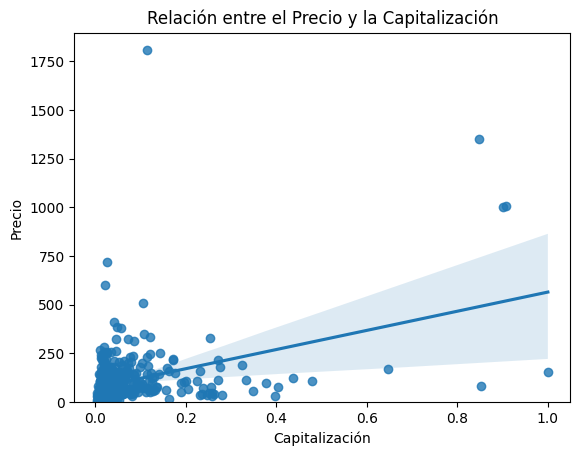

In [19]:
sns.regplot(x="Capitalización", y="Precio", data=df)
plt.ylim(0,)
plt.title("Relación entre el Precio y la Capitalización")

Text(0.5, 1.0, 'Relación entre el Precio y el Margen')

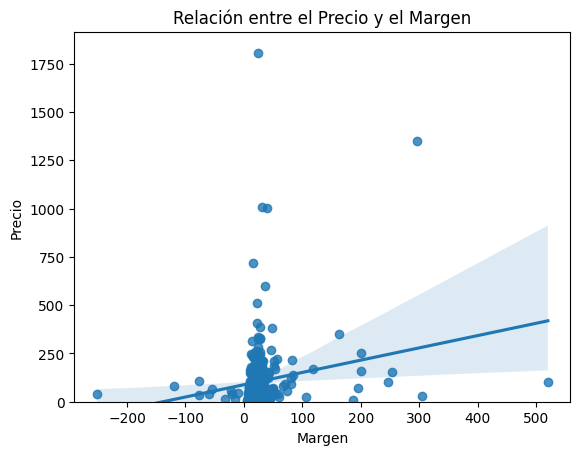

In [20]:
sns.regplot(x="Margen", y="Precio", data=df)
plt.ylim(0,)
plt.title("Relación entre el Precio y el Margen")

Text(0.5, 1.0, 'Relación entre el Precio y el Beneficio sobre Acciones')

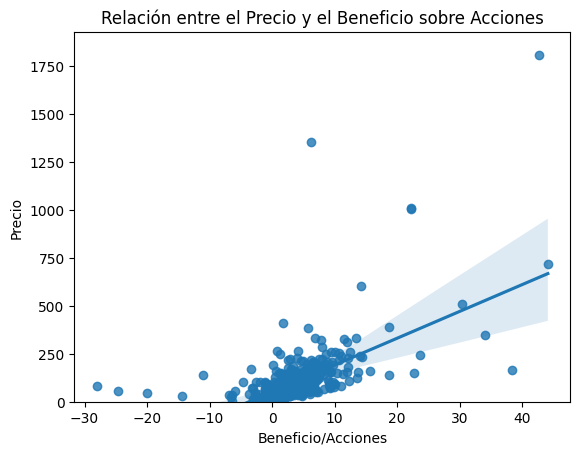

In [21]:
sns.regplot(x="Beneficio/Acciones", y="Precio", data=df)
plt.ylim(0,)
plt.title("Relación entre el Precio y el Beneficio sobre Acciones")

Text(0.5, 1.0, 'Relación entre el Precio y el Rendimiento de los dividendos')

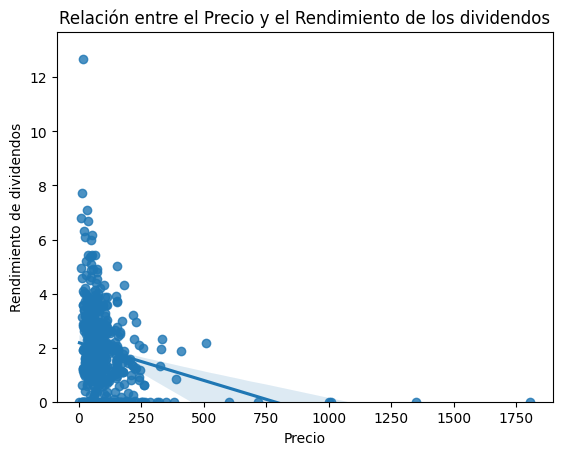

In [22]:
sns.regplot(x="Precio", y="Rendimiento de dividendos", data=df)
plt.ylim(0,)

plt.title("Relación entre el Precio y el Rendimiento de los dividendos")


##El coeficiente de correlación de Pearson:
También conocido como coeficiente de correlación lineal, es una medida estadística para cuantificar la relación lineal entre dos variables cuantitativas. Este coeficiente mide la fuerza y dirección de la relación entre las dos variables, y varía entre -1 y 1, donde:



*   Un valor de 1 indica una correlación positiva perfecta, lo que significa que a medida que una variable aumenta, la otra también lo hace de manera lineal.
*   Un valor de -1 indica una correlación negativa perfecta, lo que significa que a medida que una variable aumenta, la otra disminuye de manera lineal.
*   Un valor de 0 indica que no hay una relación lineal entre las dos variables.

Ayuda a comprender si existe una relación lineal entre dos variables y cuán fuerte es esa relación.

## El valor p (p-value)
Se utiliza para evaluar la evidencia en contra de una hipótesis nula. En el contexto del coeficiente de correlación de Pearson y otras pruebas estadísticas, el valor p se utiliza para determinar si la correlación observada entre dos variables es estadísticamente significativa o si podría haber ocurrido por pura casualidad.



*   Si el valor p es pequeño (generalmente menor que un umbral predefinido, como 0.05 o 0.01), se considera que tienes evidencia suficiente para rechazar la hipótesis nula en favor de la hipótesis alternativa, sugiere una relación significativa
*   Si el valor p es grande, no tienes evidencia suficiente para rechazar la hipótesis nula, lo que significa que la correlación podría deberse al azar.

In [23]:
pearson_coef, p_value = stats.pearsonr(df['Beneficio/Acciones'], df['Precio'])
print("El coeficiente de Pearson es", pearson_coef, " y tiene un P-value de P =", p_value)

El coeficiente de Pearson es 0.5910611927275286  y tiene un P-value de P = 6.824025084866272e-49


In [26]:
pearson_coef, p_value = stats.pearsonr(df['Rendimiento de dividendos'], df['Precio'])
print("El coeficiente de Pearson es", pearson_coef, " y tiene un P-value de P =", p_value)

El coeficiente de Pearson es -0.24462964683744526  y tiene un P-value de P = 2.568349642779243e-08


## Comenzamos a predecir utilizando algoritmos de regresión.

In [25]:
# Regresión lineal
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression()

In [27]:
X = df[['Beneficio/Acciones']]
Y = df['Precio']

In [28]:
lm.fit(X,Y) # Entrenamos el modelo

LinearRegression()

In [29]:
Yhat=lm.predict(X)
Yhat[0:5]

array([162.01796464,  75.14738472,  55.03586782,  97.35385129,
       127.38146332])

In [30]:
print ('Intercept: ',lm.intercept_)

Intercept:  51.40462171479624


In [31]:
print ('Coefficients: ', lm.coef_)

Coefficients:  [13.96633118]


Estos resultados indican que sera una regresión lineal cuya formula es la habitual Y=a+bX, donde a=intercept y donde b=coef.
Esto seria lo mismo que decir:
# Y = 51.4046 + 13.9663xBeneficio/Acciones
Con esta formula podremos predecir el precio de la acción segun estos datos. Para eso se debera reemplazar el valor Beneficio/Acciones y dara como resultado el precio de la acción.

In [32]:
Yhat=lm.predict(X)

In [33]:
lm.predict(X)


array([ 1.62017965e+02,  7.51473847e+01,  5.50358678e+01,  9.73538513e+01,
        1.27381463e+02,  6.92815256e+01,  1.55174462e+02,  9.87504844e+01,
        1.37856212e+02,  5.18236117e+01,  2.73825321e+01,  1.31711026e+02,
        2.19978239e+02,  2.05173928e+02,  8.07339172e+01,  2.42184706e+02,
        7.64043545e+01,  1.67045844e+02,  1.30454056e+02,  7.33317617e+01,
        7.61250279e+01,  9.10690023e+01,  8.45048266e+01,  5.87013422e+02,
        2.48748881e+02,  7.44490682e+01,  1.16767052e+02,  3.62434817e+02,
        3.62434817e+02,  1.25565840e+02,  1.37437222e+02,  8.88343893e+01,
        1.06012977e+02,  6.87228724e+01,  9.19069821e+01,  4.07902100e+01,
        7.89182941e+01,  8.81360727e+01,  1.83246788e+02,  7.43094048e+01,
        9.24656354e+01,  8.72980928e+01,  8.00356006e+01, -3.09967322e+01,
        8.08735805e+01,  1.37018232e+02,  9.31639519e+01,  2.51961137e+02,
        1.16487725e+02, -5.50130267e-01,  7.86389675e+01,  1.79894869e+02,
        9.56778915e+01,  

(0.0, 1923.702272783161)

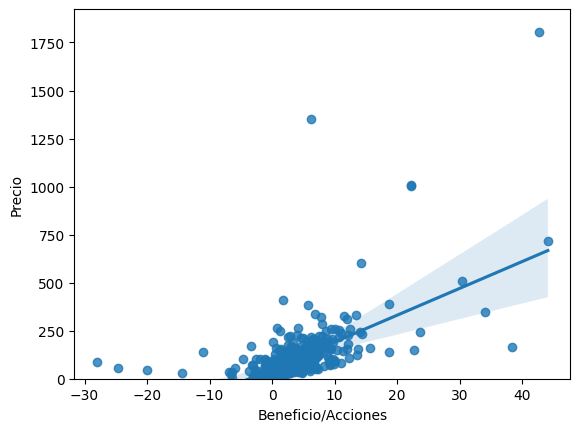

In [34]:
sns.regplot (x="Beneficio/Acciones", y="Precio", data=df)
plt.ylim (0, )

# Evaluación del modelo
A continuación se va a comparar los valores actuales y los predecidos para asi calcular la eficiencia del modelo de regresión. Las siguientes son formas en las cuales se puede evaluar el modelo.

## Mean Absolute Error:
La media de todos los valores, su ventaja es que es facil de entender. Mide cuánto se desvían, en promedio, las predicciones del modelo de los valores reales. Un MAE más bajo indica que las predicciones del modelo son más precisas, ya que las diferencias absolutas entre las predicciones y los valores reales son más pequeñas.

## Root Mean Squared Error (RMSE).
Error Cuadrático Medio de la Raíz, para medir cuán cerca están las predicciones de un modelo de los valores reales. El RMSE calcula la raíz cuadrada de la media de los cuadrados de las diferencias entre las predicciones del modelo y los valores reales. Al elevar al cuadrado las diferencias, se da más peso a los errores más grandes. Luego, la raíz cuadrada se toma para devolver la métrica a la misma escala que los valores originales, lo que facilita su interpretación

## R-squared:
Tambien llamado coeficiente de determinación, es la medida que determina que tan cerca estan los datos de encajar en la linea de regression. Osea que tan cerca esta la data actual del modelo estimado. Esta es la forma mas popular para medir la performance del modelo. A un mayor valor de R-Square mejor sera el modelo. El mejor valor del R-square es 1.0 y no puede ser negativo (porque el modelo no puede ser malo de forma arbitraria). Un valor R-Square igual a 0 significa que el modelo no explica ninguna de las variaciones en la variable dependiente. En otras palabras, el modelo es inútil para hacer predicciones.

In [35]:
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.3493533335484884


In [36]:
print ("Podemos decir que el", lm.score(X, Y), "% de la variación del precio esta explicado por el modelo de regresión lineal")

Podemos decir que el 0.3493533335484884 % de la variación del precio esta explicado por el modelo de regresión lineal


## Mean Squared Error (MSE).

Busca la diferencia entre
el valor actual y la prediccion. Vamos a suponer a modo de ejemplo un caso donde el valor actual es 150 y el de la predicción es un valor de 50. Entonces tenemos la diferencia que es 150-50=100, a esa diferencia la elevamos al cuadrado (100)². Ahora de todos los errores asi calculados sacar la media o promedio dividiendo por la cantidad de muestra. El modelo con el mennor MSE es el que mejor se ajusta a los datos.

In [38]:
from sklearn.metrics import mean_squared_error # Importo el MSE para poder utilizarlo

mse = mean_squared_error(df['Precio'], Yhat)
print('El MSE del precio y el valor que se predijo es: ', mse)

El MSE del precio y el valor que se predijo es:  11734.416271266999
